# Air BNB Seattle Dataset Project by Carina Breu
## Introduction

In this project I used the airbnb Seattle dataset to find out, how prices are set in relation to accomodation characteristics and over time.
To step into, I analyzed the market of airbnb listings in 2016 according to serveral characteristics, like room type, number of bedrooms, location and reviews.
I then wanted to find out how these characteristics are related to the prices and finally how prices change over time. 

My research question therefore are:

### Research Questions

1. What are the listings characteristics for airbnb accomodations and how are they distributed?  
2. How are the rental prices on airbnb related to different accomodation characteristics?
3. How do rental prices change over time?

## Dataset Overview

The dataset Air BNB Seattle contains detailed information about 3818 airbnb listings in 2016, which range from shared rooms to complete homes and appartments. Columns range from descripitve information like name, id, summary and description over pictures, host information, listing specifications like location, accomodates, bath and bedrooms and further equipments of the appartments. Furthermore it contains also details about booking requirements and restrictions and customer reviews.
The data is subdivided into three tables namely

* listings
* calendar and 
* reviews.

The calendar table contains information about the daily price of the listings. In the review table, we can find all reviews by customers in detail. This table, however, is not relevant for this analysis.
The key accommodation characteristics, which I will refer to in my analysis are stored in the listings table. To keep this overview clear, I will just introduce the columns, that are relevant for my further analysis.
These are
 * id
 * neighbourhood_group_cleansed: Aggregated Neighboorhood in Seattle, named after quarters
 * room_type: Shared Room, Private Room, Entire Home/Apartment
 * accommodates
 * bathrooms
 * bedrooms
 * beds
 * review_scores_value: Score from 1-10, while 10 is the best review possible.
 * review_scores_number

 There are surely further characteristics that might influence the price like the property_type for example. However this criterium has very many categories. With a dataset of only 3800 rows, to many features will easily lead to overfitting.

In my analysis I want to find out, which characterstics of appartments justify higher prices.
I therefore pick out the following potentially relevant columns and will provide deeper insights about their distribution and correlation with the mean appartment price.

The appartment price is stored in the calendar table, since price can change on a daily basis. The calendar table contains the following columns:
* listing_id	
* date	
* available	
* price


## Data Preparation

To start with, let's import all libraries that are neccessary for all further steps.

In [193]:
#Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import requests
import json

%matplotlib inline

To start with, I import all the listings and the calendar table from my local project folder, which I downloaded before from https://www.kaggle.com/datasets/airbnb/seattle/data. Since we do not need the reviews table, I will not import it at all.

In [194]:
#Import Datasets (listings, calendar and reviews)
df_list=pd.read_csv('listings.csv')
df_calendar=pd.read_csv('calendar.csv')

### Listings Table

The table listings has 92 columns and 3818 rows. To get an idea of the dataset, I show the first 5 rows below and the column overview.

In [195]:
#Show first 5 rows of listings dataset
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [196]:
# Column and datatype infos
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Calendar Table

The calendar table has only 4 columns but 1393570 rows, since it contains daily prices for every listing. Get an overview about this seconds table below: 

In [197]:
#Show first 10 rows of Calendar dataset
df_calendar.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [198]:
#Columns and datatypes of Calendar dataset
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


To work with the calendar table, I create a table named "df_cal_clean" I transform the column date to datatype datetime and add a price_USD column where I store the price as a float.  

In [199]:
# Clean df_calendar and remove currency from price column and convert to float and set date to datatype datetime
df_cal_clean=df_calendar
df_cal_clean['date']=pd.to_datetime(df_cal_clean['date'])
df_cal_clean['price_USD']=df_cal_clean['price'].str.replace('$','')
df_cal_clean['price_USD']=df_cal_clean['price_USD'].str.replace(',','')
df_cal_clean['price_USD']=df_cal_clean['price_USD'].astype('float')

Furthermore, I add the column room_type to the "df_cal_clean" by joining the listings table and to subdivide according to this characteristic also in the timeline of prices later on.
For the price and characteristics analysis, I calculate the mean yearly price in the table "df_mean_price".

In [201]:
# Add room_type to Calendartable
df_cal_clean=pd.merge(df_cal_clean,df_list_cleaned[['id','room_type']], left_on='listing_id',right_on='id')

# Add mean price to table df_list
df_mean_price=df_cal_clean[['listing_id','price_USD']].groupby('listing_id').mean('price_USD')
df_mean_price=df_mean_price.rename(columns={'price_USD':'mean_price'})


I also prepare a cleaned version of the listings table "df_list_cleaned", in which I store only those columns, that are relevant for my further analysis.
Finally, I add the mean_price for each listing to the cleaned table. By joining the mean price table, several listings will not be shown anymore, as no price is available for those accomodations. Since accomodations, that cannot be booked throughout the whole year, are not relevant for the market overview and price statistics, this does not harm our statistics. For display purposes, I change the datatype of "neighbourhood_group_cleansed" to an ordered Categorical Datatype and rename it to "nhg" (Neighbourhood group) for display purposes in the latter charts.

In [206]:
# Create subset of the listings table with the characteristics, that are relevant for the analysis.
df_list_cleaned=df_list[['id','room_type','accommodates','bathrooms','bedrooms','beds','number_of_reviews','review_scores_value','neighbourhood_group_cleansed']]

# Add mean price to table df_list
df_list_cleaned=pd.merge(df_list_cleaned,df_mean_price, left_on='id',right_on='listing_id')

In [369]:
#Rename column 'neighbourhood_group_cleansed' to nhg (neighbourhood group) to make plot labels shorter
df_list_cleaned=df_list_cleaned.rename(columns={'neighbourhood_group_cleansed':'nhg'})

nhgs=list(df_list_cleaned['nhg'].value_counts().index)
nhgs.remove('Delridge')
nhgs.insert(0,'Delridge')
nh_groups=pd.CategoricalDtype(ordered=True, categories=nhgs)
df_list_cleaned['nhg']=df_list_cleaned['nhg'].astype(nh_groups)

room_types=list(df_list_cleaned['room_type'].value_counts(ascending=True).index)
rt_groups=pd.CategoricalDtype(ordered=True, categories=room_types)
df_list_cleaned['room_type']=df_list_cleaned['room_type'].astype(rt_groups)


In [352]:
df_list_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   3074 non-null   int64   
 1   room_type            3074 non-null   object  
 2   accommodates         3074 non-null   int64   
 3   bathrooms            3074 non-null   float64 
 4   bedrooms             3074 non-null   float64 
 5   beds                 3074 non-null   float64 
 6   number_of_reviews    3074 non-null   int64   
 7   review_scores_value  3074 non-null   float64 
 8   nhg                  3074 non-null   category
 9   mean_price           3074 non-null   float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 219.9+ KB


## Modeling

For my second research question, I start with a Linear Regression which I will model in this section. As dependent variable I take the mean price.

In [370]:
# Function to create dummys for category variables
def create_dummy_df(df,cat_cols,dummy_na):
    for col in cat_cols:
        #try:
            df=pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=dummy_na)],axis=1)
        #except: continue
    return df

I now create a new table "df_model_price" where I change object and category columns to dummy variable columns.

In [371]:
# Create a table for the price model
df_model_price=df_list_cleaned

#Extract category columns
cat_cols=list(df_model_price.select_dtypes(include=['object','category']).columns)
num_cols=list(df_model_price.select_dtypes(include=['int','float']).columns)
num_cols.remove('id')

#Create Dummy Variables for Category Variables
df_model_price=create_dummy_df(df_model_price,cat_cols,True)

#Show table df_model_price with dummy columns
df_model_price.head()

,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_value,mean_price,room_type_Private room,room_type_Entire home/apt,...,nhg_Rainier Valley,nhg_Beacon Hill,nhg_University District,nhg_Cascade,nhg_Northgate,nhg_Lake City,nhg_Magnolia,nhg_Seward Park,nhg_Interbay,nhg_nan
0,241032,4,1.0,1.0,1.0,207,10.0,85.000000,False,True,...,False,False,False,False,False,False,False,False,False,False
1,953595,4,1.0,1.0,1.0,43,10.0,170.931271,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3308979,11,4.5,5.0,7.0,20,10.0,1301.818182,False,True,...,False,False,False,False,False,False,False,False,False,False
3,278830,6,2.0,3.0,3.0,38,9.0,462.739726,False,True,...,False,False,False,False,False,False,False,False,False,False
4,5956968,2,1.0,1.0,1.0,17,10.0,125.629139,True,False,...,False,False,False,False,False,False,False,False,False,False


Data is now prepared to train the Linear Regression Model.

In [374]:
#Solit into explanatory and response variables
X=df_model_price.drop(['mean_price','id'],axis=1)
y=df_model_price['mean_price']

#Split into train and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=25)
#Instantiate
lm_model= LinearRegression()
#Fit
lm_model.fit(X_train,y_train)

#Predict using the model
y_test_preds=lm_model.predict(X_test)
y_train_preds=lm_model.predict(X_train)

#Score the Model
test_score=r2_score(y_test,y_test_preds)
train_score=r2_score(y_train,y_train_preds)

print(f'R2 Score of the Test Data: {test_score}, and R2 Score of the Train data: {train_score}')


R2 Score of the Test Data: 0.6258921568785563, and R2 Score of the Train data: 0.6412191714175944


The fit of the Regression Model is not too bad with an R2 of 0.63 for the test data. Let's now get an idea about the coefficients:

In [385]:
# Show coefficients of Linear Regression
def coef_weights(coefficients,X_train):
    ''' The function coef_weights returns a dataframe of coeficients from the Linear Regression ordered by their absolute value.'''
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=X_train.columns
    coefs_df['coefs']=lm_model.coef_
    coefs_df['abs_coefs']=np.abs(lm_model.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    return coefs_df

#Dataset with coefficients from Linear Regression
coef_df=coef_weights(lm_model.coef_,X_train)
coef_df.apply(lambda x: round(x, 2))

,est_int,coefs,abs_coefs
7,room_type_Entire home/apt,80.02,80.02
10,nhg_Downtown,77.52,77.52
19,nhg_Cascade,54.36,54.36
13,nhg_Queen Anne,50.09,50.09
6,room_type_Private room,44.73,44.73
11,nhg_Capitol Hill,44.06,44.06
22,nhg_Magnolia,43.70,43.70
2,bedrooms,33.28,33.28
1,bathrooms,31.31,31.31
24,nhg_Interbay,30.28,30.28


The table shows, that the neighboorhood of the accomodation has a huge effect on the model price. Additonally, the room type plays a major role. If an accomodation is a shared room, prices are much lower, according to the model (+80.02 USD) than for a whole home or appartment.
As expected, also the number of rooms has a huge impact on the price. With each additional bathroom the price will be 31.31 USD higher. A similar increase is proposed for each additional bedroom, which will raise the price by 33.28 USD. 
Against my expectations, reviews have almost no effect on the price. 

In [387]:
#Change the order of the nhg-colmn to make charts clearer
nhgs=list(df_list_cleaned['nhg'].value_counts().index)
nhgs.remove('Other neighborhoods')
nhgs.append('Other neighborhoods')
nh_groups=pd.CategoricalDtype(ordered=True, categories=nhgs)
df_list_cleaned['nhg']=df_list_cleaned['nhg'].astype(nh_groups)


## Evaluation

### Research Question No 1. What are the listings characteristics of airbnb accomodations and how are they distributed? 

To get an overview about the characteristics of airbnb accommodations, we can look a the distribution of accomodations according to their
* Neighbourhood
* Room Type (Shared Room, Priate Room, Entire Home/ Apartment)
* Review Scores
* No. of bedrooms

Text(0.5, 1.0, 'Number of Listings after Room Type')

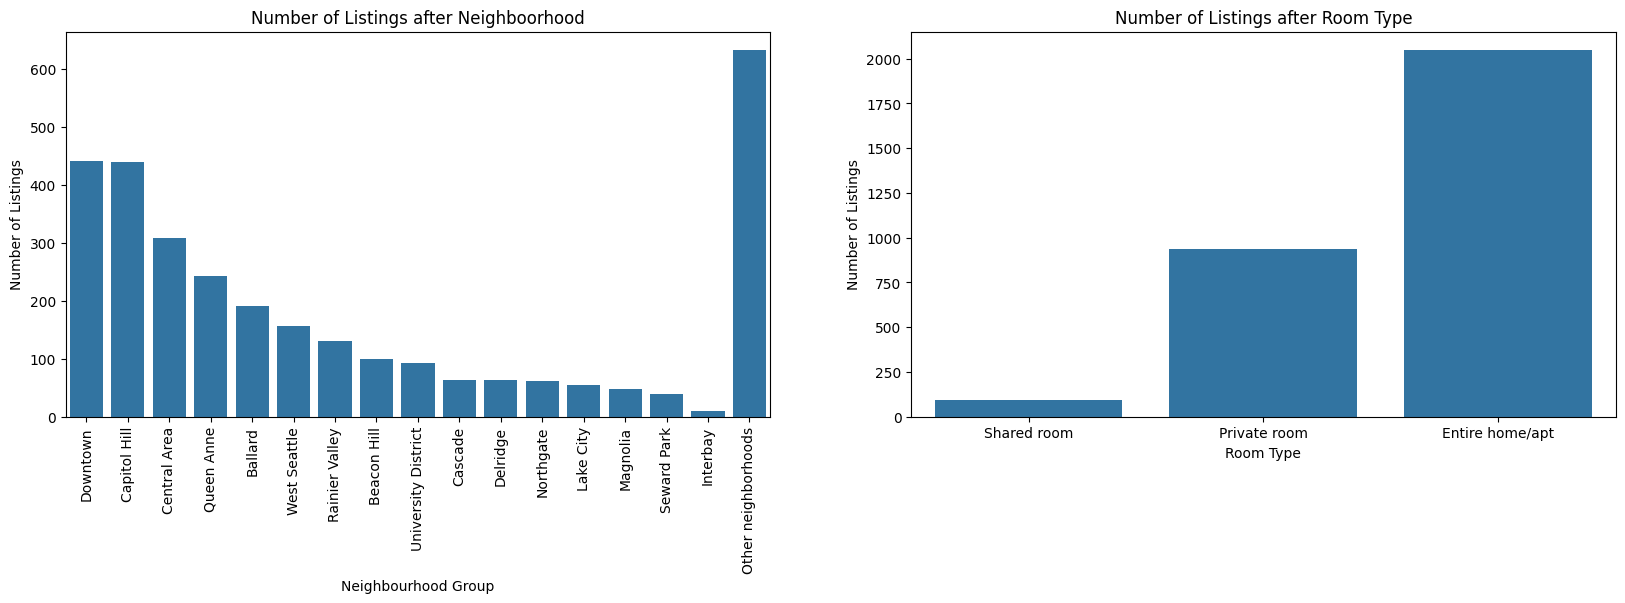

In [388]:
plt.figure(figsize=[20,5])

#Neighboorhood Countplot
plt.subplot(1,2,1)
sns.countplot(data=df_list_cleaned, x='nhg')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Neighboorhood')


#Room Type Countplot
plt.subplot(1,2,2)
sns.countplot(data=df_list_cleaned, x='room_type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Room Type')


Text(0.5, 1.0, 'Number of Listings after Bedrooms')

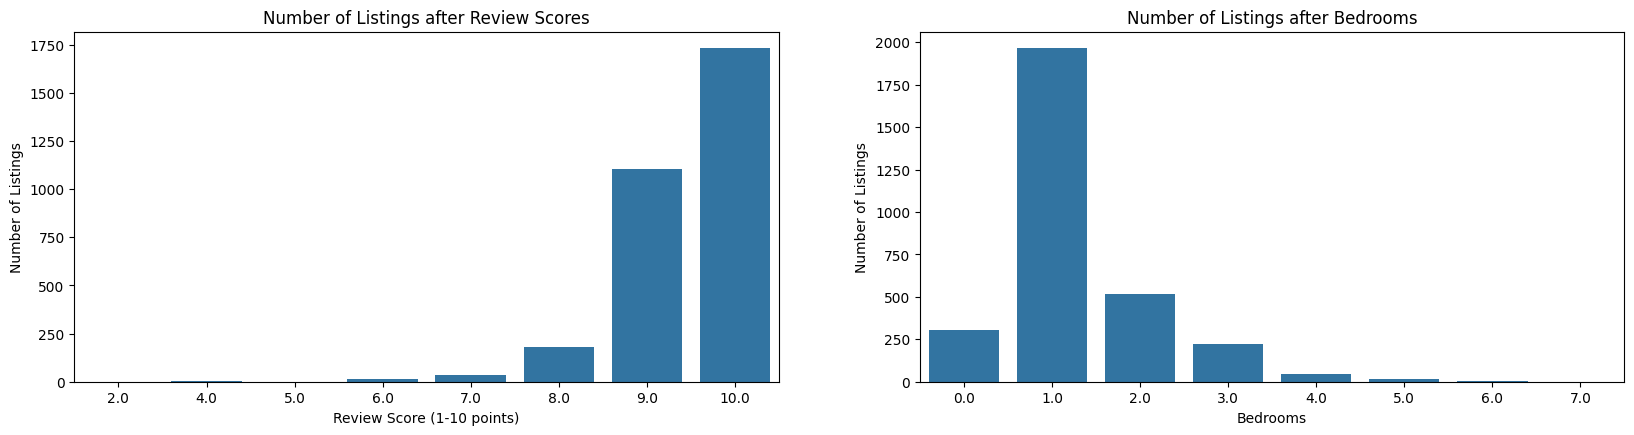

In [389]:
plt.figure(figsize=[20,10])

#Review Scores Countplot
plt.subplot(2,2,1)
sns.countplot(data=df_list_cleaned, x='review_scores_value')
plt.xlabel('Review Score (1-10 points)')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Review Scores')

#Bedroom Countplot
plt.subplot(2,2,2)
sns.countplot(data=df_list_cleaned, x='bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Bedrooms')

The first chart shows, that most of the listings on airbnb are located in the neighbourhoods Downtown and Capitol Hill. The most typical room type on airbnb is the "entire Home/Appartment". Shared rooms are very rare in comparison. Private rooms make about 1/3 of the accomodations on airbnb in Seattle.
More than half of the listings have review scores of 10, which is the highest possible rating. 1/3 has review score of 9  and only few listings have review scores of 8 and below.
Two thirds of the accomodations have one bedroom, and the other third has either 0 or 2 and more bedrooms. Least for this question, we can get an idea about the prices on airbnb in Seattle.

(0.0, 800.0)

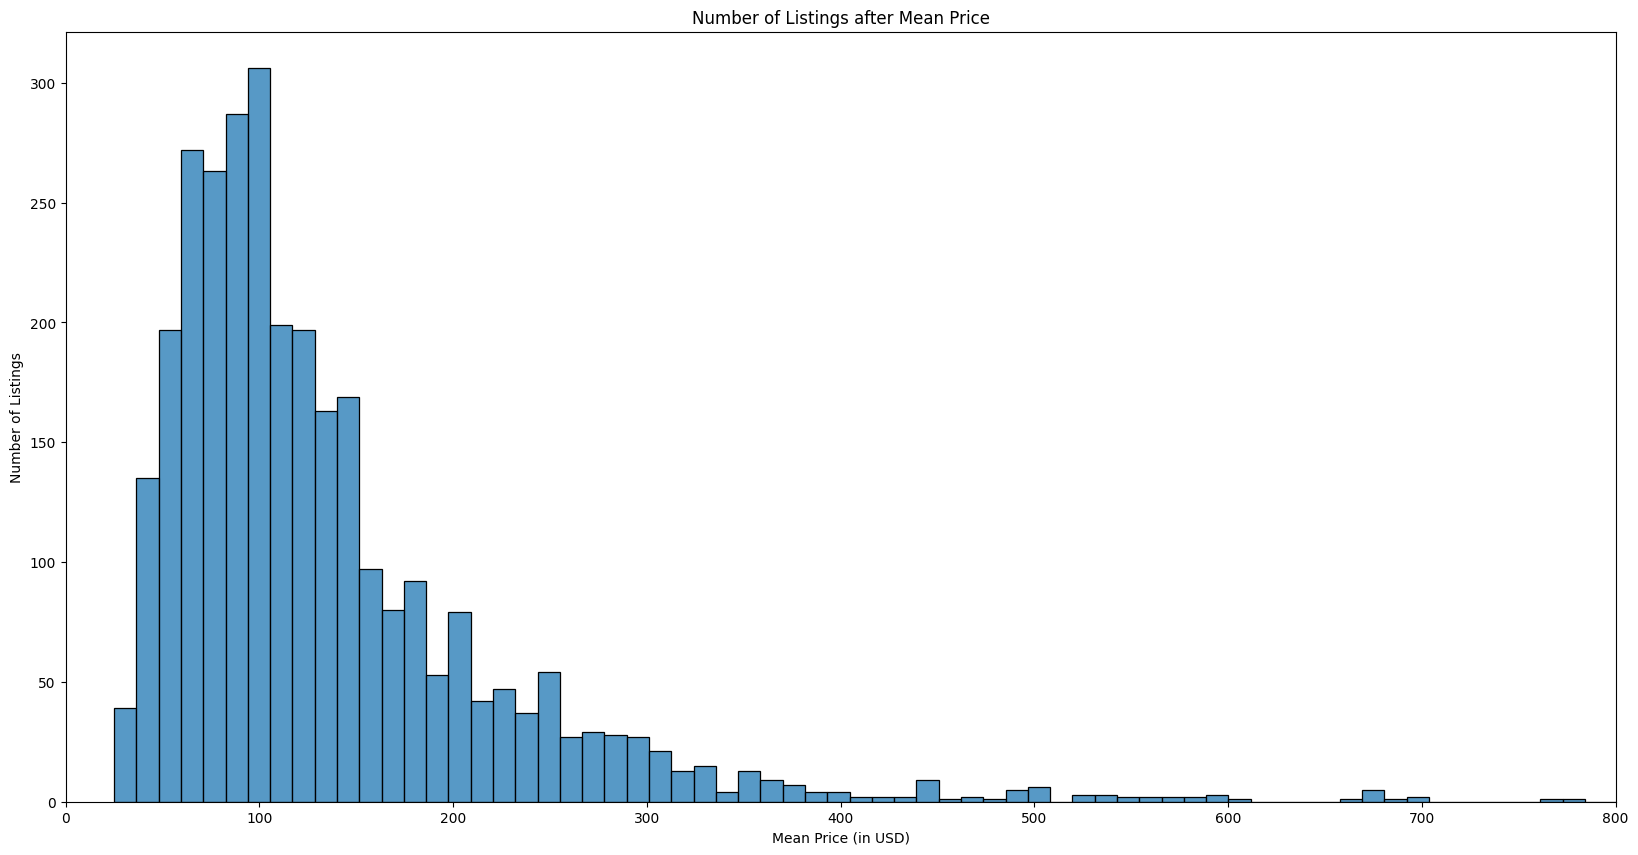

In [390]:
#Mean Price Histogram
plt.figure(figsize=[20,10])
sns.histplot(data=df_list_cleaned, x='mean_price')
plt.xlabel('Mean Price (in USD)')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Mean Price')
plt.xlim(0,800)

The mean price of accomodations has a left skewed distribution. To make the chart clearer, I limited the x-Axis to 800 USD. However the majority of accomodations has mean prices between 50 and 150 USD. 
To understand, how this price deviation can be explained we have to identify the characteristics, that are linked to higher prices. 

### Research Question No. 2: How are the rental prices on airbnb related to different accomodation characteristics?

To get an idea about the ralation between mean price and accommodation characteristics, I started with a correlation matrix.

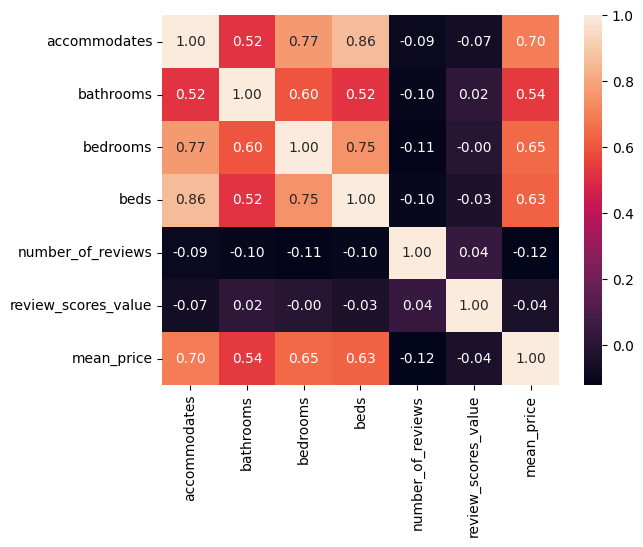

In [391]:
#Correlation Matrix
sns.heatmap(df_list_cleaned[num_cols].corr(), annot=True, fmt=".2f");

Here we can clearly see, that the correlation between accomodates, bathrooms, bedrooms, beds and the mean price, which are all higher than 0.5. The highest correlation with the mean price is the correlation to accommodates with 0.7. 
However, we see almost not correlation between the two review columns and the price.

In a bar chart we can compare the mean price between different neighbourhoods. I also distinguished between different room types, since this is a huge impact factor on the mean price and did the same for different review scores between 7 and 10.

Text(0.5, 1.0, 'Mean Listing Price after Accomodates and Room Type')

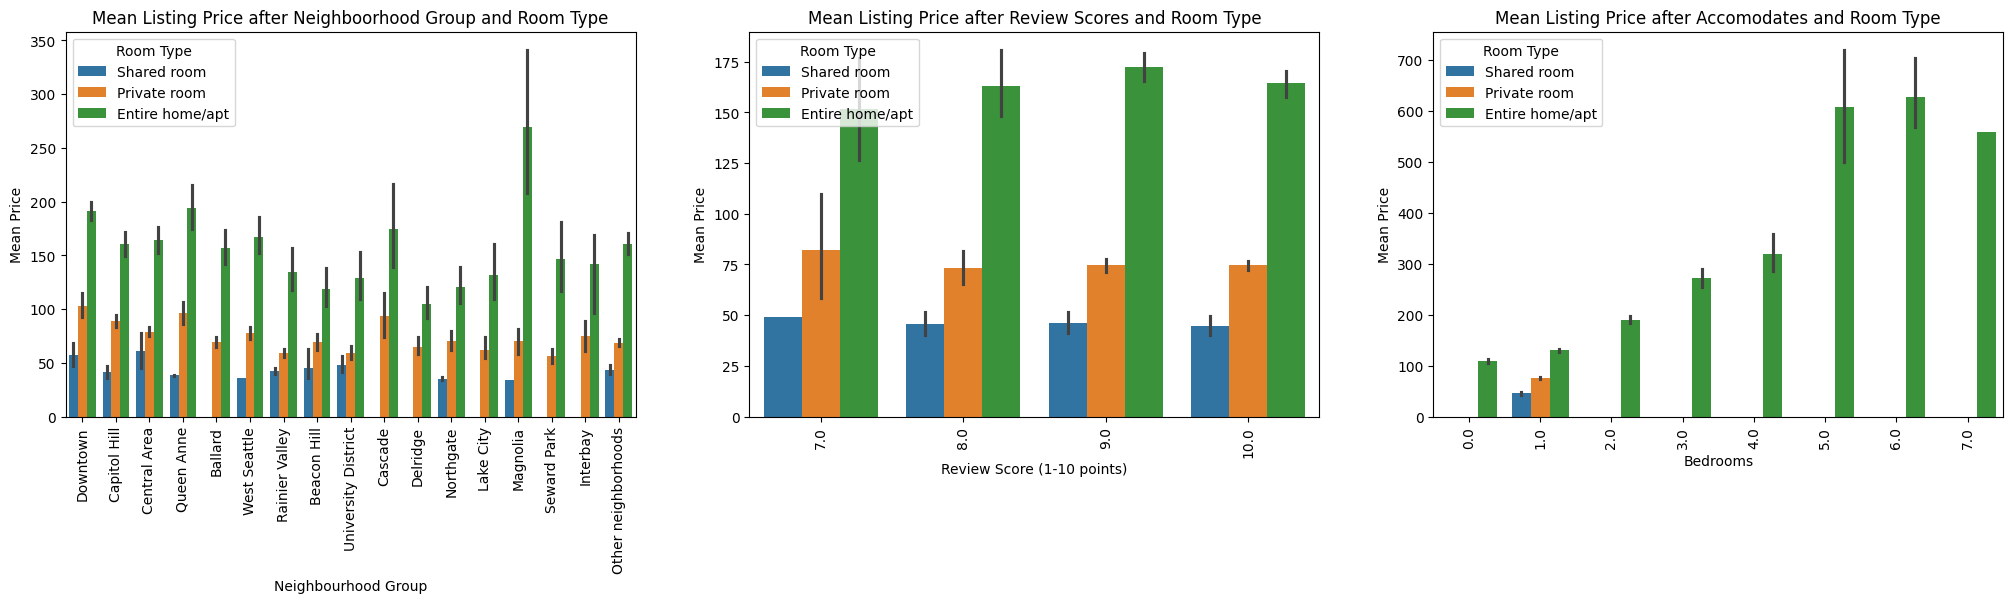

In [395]:
#Neighboorhood Price
fig=plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.barplot(data=df_list_cleaned, x='nhg',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Neighboorhood Group and Room Type')

#Barchart Mean Listing Price after Review Scores and Room Type
plt.subplot(1,3,2)
sns.barplot(data=df_list_cleaned[df_list_cleaned['review_scores_value']>6], x='review_scores_value',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Review Score (1-10 points)')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Review Scores and Room Type')

# Barchart Mean Price after Bedrooms
plt.subplot(1,3,3)
sns.barplot(data=df_list_cleaned, x='bedrooms',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Bedrooms')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Accomodates and Room Type')

The first chart shows, that prices for all room types are highest in "Downtown". The result for Magnolia seems to be due to an outlier, which is also indicated by the high variability for entire homes. Entire home prices are lowest in Delridge and cheaper private rooms can be found in several neighbourhood groups like "University District","Seward Park", "Rainier Valley" or "Lake City". 

The seconds chart confirms what we saw in the correlation matrix. OVer all room types, I cannot recognize any price tendency with increasing or decreasing review scores. 

In the third chart, we can understand, that Shared and Private rooms always are limited to one bedroom in Seattle. Only Entire Homes/Appartments have different bedroom numbers. With increasing number of bedrooms, the charts shows a clear increase in mean prices. 

To get a deeper understanding, I fitted a linear regression model on 30% of the data (X_Train) and tested it with the rest 70% of the data (X_test). Below, I depicted the coefficients which resulted from the regression model.

Text(0.5, 1.0, 'Linear Regression Mean price against different accommodation characterists')

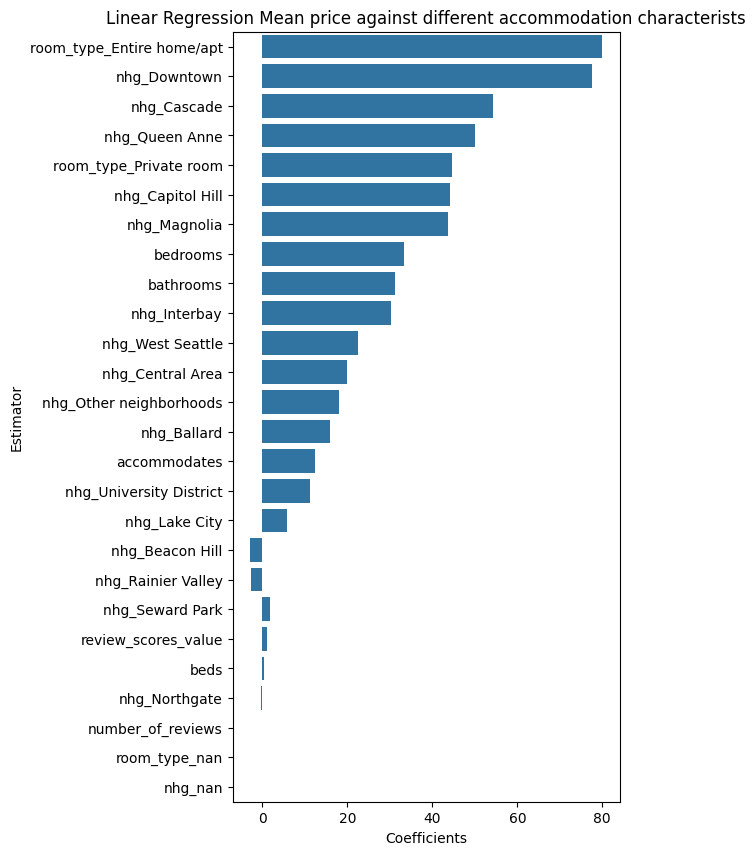

In [392]:
#Regression Coefficients Price depending on reviews, neighboorhood and accomodation characteristics

fig=plt.figure(figsize=(5,10))
sns.barplot(data=coef_df, x='coefs' ,y='est_int')
plt.ylabel('Estimator')
plt.xlabel('Coefficients')
plt.title('Linear Regression Mean price against different accommodation characterists')

The coefficients show of the model indicate, that entire Homes/Appartments are about 80 USD higher in price than shared rooms followed by Private Rooms which are modeled to be about 45 USD higher in price. 
The price also depends strongly on the neighboorhood group where the accommodation is located. The highest prices for comparable accomodations can be expected for "Downtown", followed by "Cascade" and "Queen Anne". 
For each additional bedroom or bathroom, the model calculates a price increase of about 30 USD.  
As stated before, also the Linear regression predicts hardly any impact of reviews on the price.

### Research Question No. 3: How do rental prices change over time?

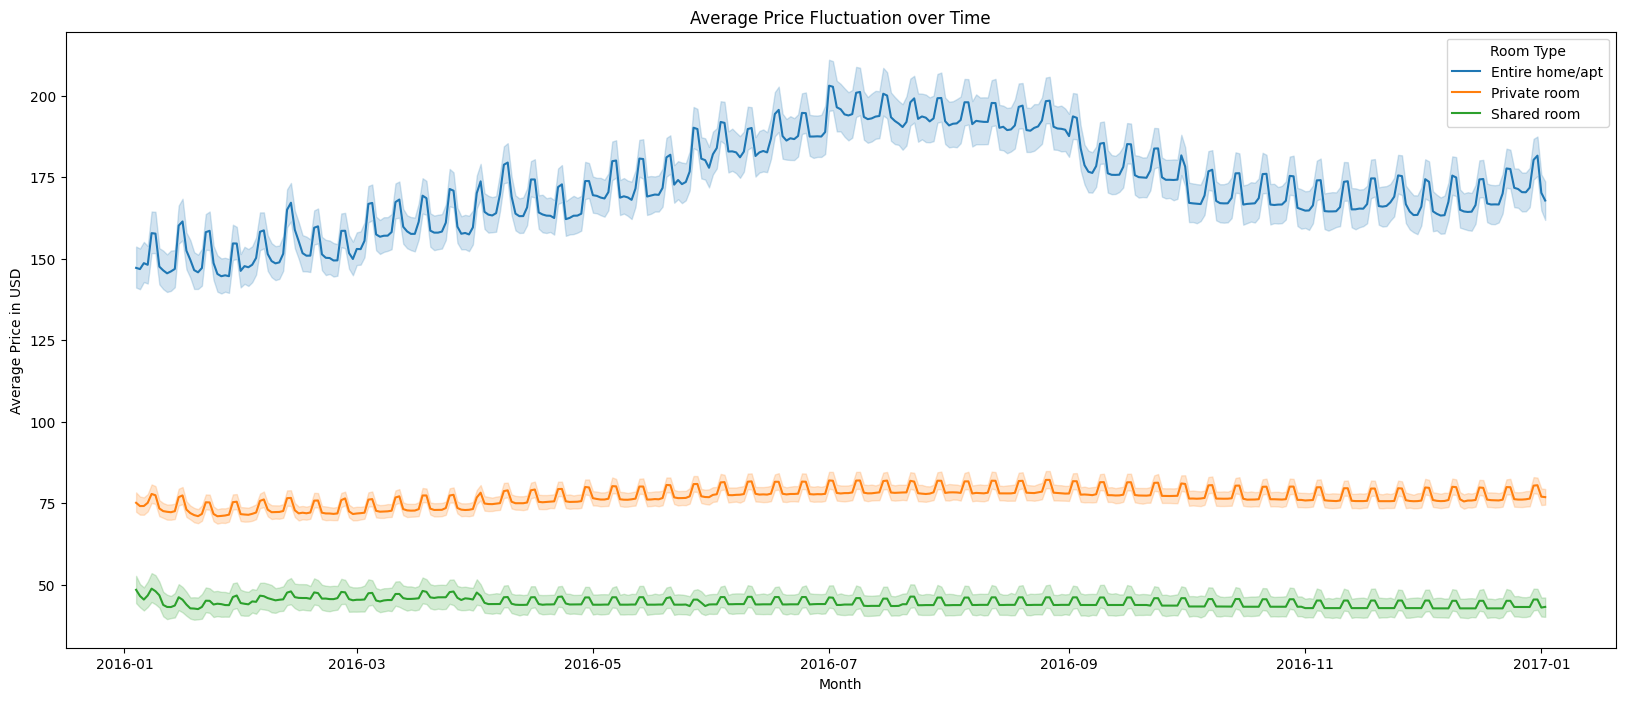

In [170]:
# Lineplot Average Price over Time according to Room Type
fig=plt.figure(figsize=(20,8))
sns.lineplot(data=df_cal_clean, x='date', y='price_USD', hue='room_type')
plt.xlabel('Month')
plt.ylabel('Average Price (in USD)')
plt.title('Average Price Fluctuation over Time')
plt.legend(title='Room Type')

In [ ]:
## Deployment

## Which price can YOU charge for your accomodation on Airbnb? 
This article will help you to understand the airbnb market price in Seattle and will help you to set the optimal price for your offer!
 
### Introduction

Have you ever asked yourself, which accomodation characteristics justify higher renting prices?

When I usually search for my next holiday accomodation, I always begin by entering the number of persons and a downside rating threshold.
Throughout my analysis of the Seattle Airbnb Dataset however, I realized, that positive ratings have almost any effect on the prices charged by hosts on airbnb, compared to other factors.

The Seattle Airbnb dataset covers 3818 listings on Airbnb in Seattle and daily pricing data for the whole year of 2016.
It provides detailed information about the room type, neighboorhood, accommodates, bedrooms and rating reviews.

The main price drivers however are
    * Room Type
    * Location
    * Time (Weekend and Seasonal Fluctuation)

### Part I Which characteristics are linked to higher prices?

Text(0.5, 1.0, 'Linear Regression Mean price against different accommodation characterists')

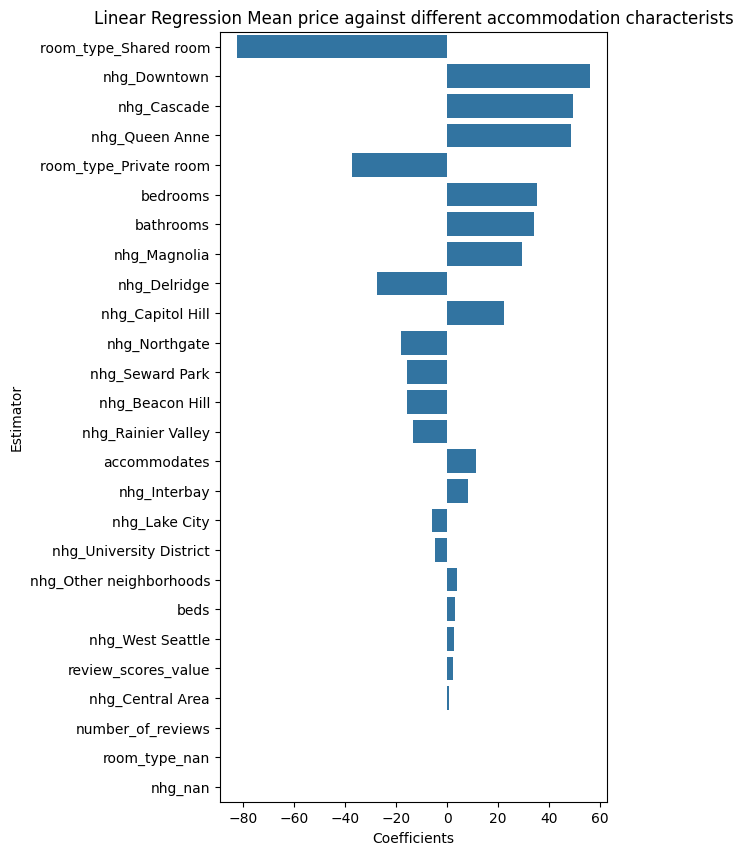

In [184]:
fig=plt.figure(figsize=(5,10))
sns.barplot(data=coef_df, x='coefs' ,y='est_int')
plt.ylabel('Estimator')
plt.xlabel('Coefficients')
plt.title('Linear Regression Mean price against different accommodation characterists')

### Part II: Location and Average Prices? 

Text(0.5, 1.0, 'Mean Listing Price after Neighboorhood Group and Room Type')

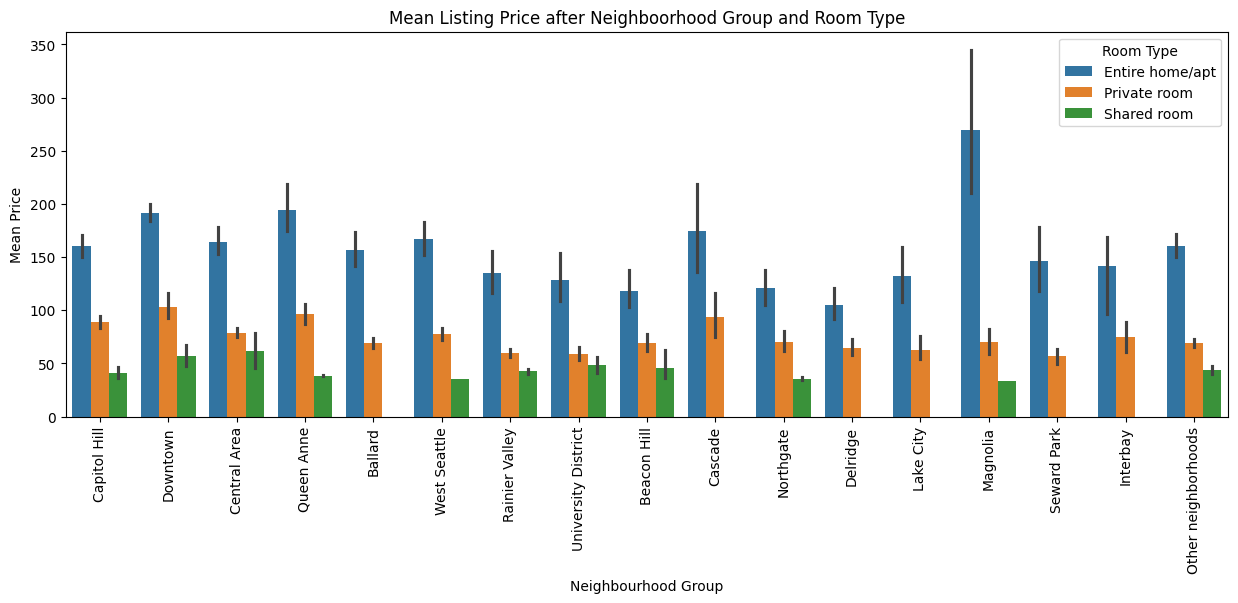

In [173]:
#Neighboorhood Price
fig=plt.figure(figsize=(15,5))
sns.barplot(data=df_list_cleaned, x='nhg',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Neighboorhood Group and Room Type')

### Part III Reviews

Text(0.5, 1.0, 'Mean Listing Price after Review Scores and Room Type')

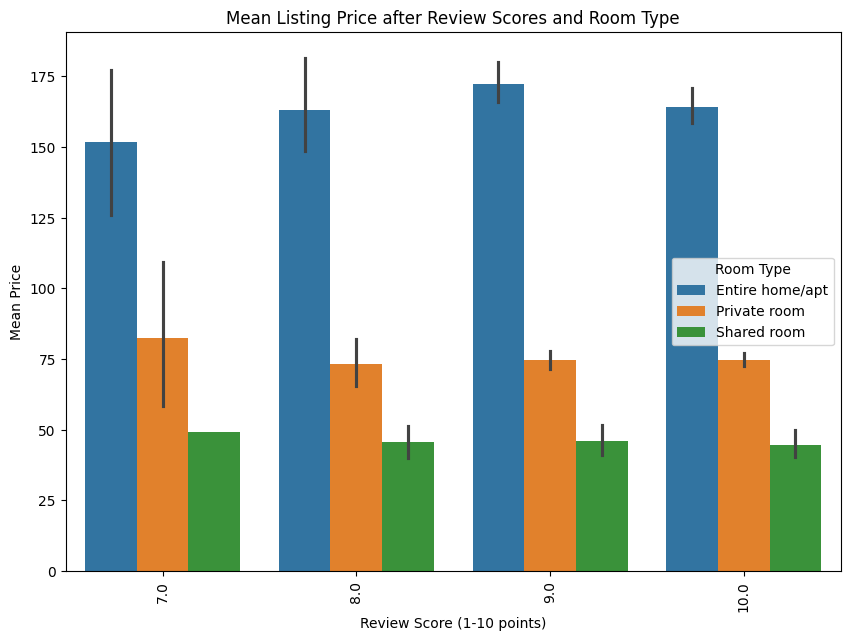

In [176]:
#Review Price
fig=plt.figure(figsize=(10,7))
sns.barplot(data=df_list_cleaned[df_list_cleaned['review_scores_value']>6], x='review_scores_value',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Review Score (1-10 points)')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Review Scores and Room Type')

### Research Question No. 3: How do rental prices change over time?

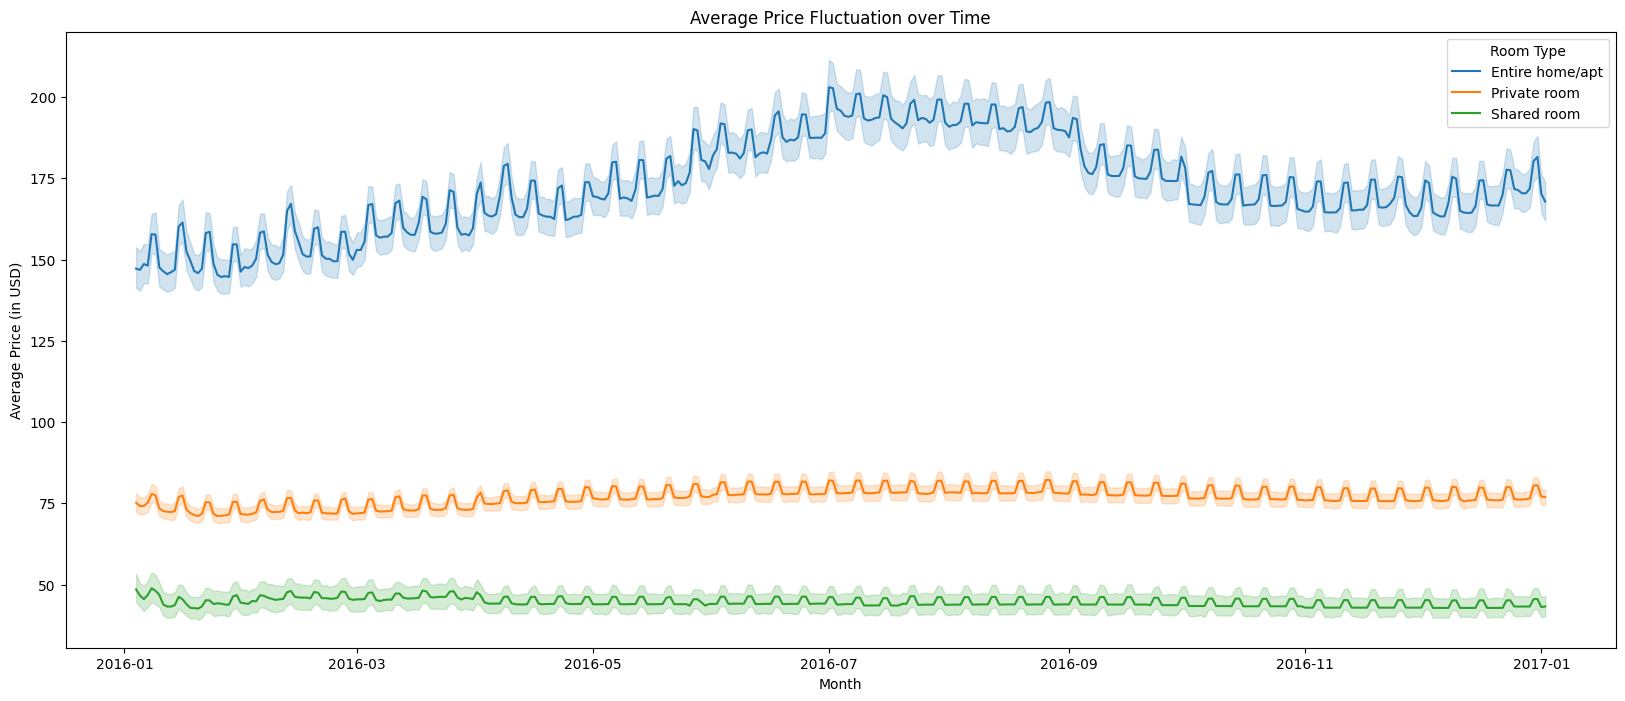

In [171]:
# Lineplot Average Price over Time according to Room Type
fig=plt.figure(figsize=(20,8))
sns.lineplot(data=df_cal_clean, x='date', y='price_USD', hue='room_type')
plt.xlabel('Month')
plt.ylabel('Average Price (in USD)')
plt.title('Average Price Fluctuation over Time')
plt.legend(title='Room Type')

### Conclusion